# Titanic Survival Classification

In [1]:
from pycaret import *

## Train Data

In [2]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Test Data Passenger ID

In [3]:
df_gs = pd.read_csv("gender_submission.csv")
df_gs.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Test Data 

In [4]:
data_test = pd.read_csv("test.csv")
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Dropping unwanted data

In [7]:
df=df.drop(['Cabin'],axis=1)
df=df.drop(['Ticket'],axis=1)
df=df.drop(['Fare'],axis=1)
df=df.drop(['PassengerId'],axis=1)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S
...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,C


In [8]:
data_test=data_test.drop(['Cabin'],axis=1)
data_test=data_test.drop(['Ticket'],axis=1)
data_test=data_test.drop(['Fare'],axis=1)
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,S
...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,S


In [9]:
df.isnull().sum(axis=0)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

## Convert Name to Categorical Data

In [10]:
def set_Name(row):
    if 'Mr.' in row.Name:
        row.Name= 'Mr.'
    elif 'Miss.' in row.Name:
        row.Name= 'Miss.'
    elif 'Mrs.' in row.Name:
        row.Name= 'Mrs.'
    else:
        row.Name= 'Misc'
    return row
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S
...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,C


In [11]:
df = df.apply(set_Name, axis="columns")
data_test = data_test.apply(set_Name, axis="columns")

In [12]:
df_save=df
df=df.dropna()

In [13]:
data_test.isnull().sum(axis=0)


PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Embarked        0
dtype: int64

## Get Age Of Each Category

In [14]:
Age = {'Mr.':0,'Mrs.':0,'Miss.':0,'Misc':0}
Mr_age=[]
Mrs_age=[]
Miss_age=[]
Misc_age=[]
def get_age(row):
    if row.Name == 'Mr.':
        Mr_age.append(row.Age)
    elif row.Name == 'Mrs.':
        Mrs_age.append(row.Age)
    elif row.Name == 'Miss.':
        Miss_age.append(row.Age)
    else:
        Misc_age.append(row.Age)
    return row


## Median Age to fill NaN values

In [15]:
df.apply(get_age,axis="columns")

from statistics import *
Age = {'Mr.':median(Mr_age),'Mrs.':median(Mrs_age),'Miss.':median(Miss_age),'Misc':median(Misc_age)}
print(Age)
df=df_save

{'Mr.': 30.0, 'Mrs.': 35.0, 'Miss.': 21.0, 'Misc': 9.0}


In [16]:
def set_age(row):
    if 'Mr.' in row.Name:
        row.Age= Age['Mr.']
    elif 'Miss.' in row.Name:
        row.Age= Age['Mrs.']
    elif 'Mrs.' in row.Name:
        row.Age= Age['Miss.']
    else:
        row.Age= Age['Misc']
    return row
        
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,0,3,Mr.,male,22.0,1,0,S
1,1,1,Mrs.,female,38.0,1,0,C
2,1,3,Miss.,female,26.0,0,0,S
3,1,1,Mrs.,female,35.0,1,0,S
4,0,3,Mr.,male,35.0,0,0,S
...,...,...,...,...,...,...,...,...
886,0,2,Misc,male,27.0,0,0,S
887,1,1,Miss.,female,19.0,0,0,S
888,0,3,Miss.,female,NaN,1,2,S
889,1,1,Mr.,male,26.0,0,0,C


In [17]:
df = df.apply(set_age, axis="columns")
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,0,3,Mr.,male,30.0,1,0,S
1,1,1,Mrs.,female,21.0,1,0,C
2,1,3,Miss.,female,35.0,0,0,S
3,1,1,Mrs.,female,21.0,1,0,S
4,0,3,Mr.,male,30.0,0,0,S
...,...,...,...,...,...,...,...,...
886,0,2,Misc,male,9.0,0,0,S
887,1,1,Miss.,female,35.0,0,0,S
888,0,3,Miss.,female,35.0,1,2,S
889,1,1,Mr.,male,30.0,0,0,C


In [18]:
data_test = data_test.apply(set_age, axis="columns")
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,892,3,Mr.,male,30.0,0,0,Q
1,893,3,Mrs.,female,21.0,1,0,S
2,894,2,Mr.,male,30.0,0,0,Q
3,895,3,Mr.,male,30.0,0,0,S
4,896,3,Mrs.,female,21.0,1,1,S
...,...,...,...,...,...,...,...,...
413,1305,3,Mr.,male,30.0,0,0,S
414,1306,1,Misc,female,9.0,0,0,C
415,1307,3,Mr.,male,30.0,0,0,S
416,1308,3,Mr.,male,30.0,0,0,S


In [19]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [20]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [21]:
from sklearn import preprocessing
data=df

## Using Get dummies for categorical data

In [22]:
name_dummies = pd.get_dummies(data.Name, prefix='Name')
sex_dummies = pd.get_dummies(data.Sex, drop_first=True, prefix='Sex')
embarked_dummies = pd.get_dummies(data.Embarked, prefix='Embarked')
data = pd.concat([data, name_dummies, sex_dummies, embarked_dummies], axis=1) 
data.drop(['Name', 'Sex', 'Embarked'], axis=1, inplace = True)
data.head()


,Survived,Pclass,Age,SibSp,Parch,Name_Misc,Name_Miss.,Name_Mr.,Name_Mrs.,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,30.0,1,0,0,0,1,0,1,0,0,1
1,1,1,21.0,1,0,0,0,0,1,0,1,0,0
2,1,3,35.0,0,0,0,1,0,0,0,0,0,1
3,1,1,21.0,1,0,0,0,0,1,0,0,0,1
4,0,3,30.0,0,0,0,0,1,0,1,0,0,1


In [23]:
name_dummies2 = pd.get_dummies(data_test.Name, prefix='Name')
sex_dummies2 = pd.get_dummies(data_test.Sex, drop_first=True, prefix='Sex')
embarked_dummies2 = pd.get_dummies(data_test.Embarked, prefix='Embarked')
data_test = pd.concat([data_test, name_dummies2, sex_dummies2, embarked_dummies2], axis=1) 
data_test.drop(['Name', 'Sex', 'Embarked'], axis=1, inplace = True)
data_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Name_Misc,Name_Miss.,Name_Mr.,Name_Mrs.,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,30.0,0,0,0,0,1,0,1,0,1,0
1,893,3,21.0,1,0,0,0,0,1,0,0,0,1
2,894,2,30.0,0,0,0,0,1,0,1,0,1,0
3,895,3,30.0,0,0,0,0,1,0,1,0,0,1
4,896,3,21.0,1,1,0,0,0,1,0,0,0,1


In [24]:
print(data.shape,data_test.shape)

(891, 13) (418, 13)


## Classification Begins

In [25]:
from pycaret.classification import *
Algo=setup(data=data,target='Survived',session_id=1234)

,Description,Value
0,session_id,1234
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(891, 13)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [26]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8089,0.8556,0.6167,0.8503,0.7084,0.5735,0.5941,0.0370
dt,Decision Tree Classifier,0.8058,0.8051,0.6167,0.8442,0.7032,0.5667,0.5881,0.0180
et,Extra Trees Classifier,0.8042,0.8294,0.6208,0.8350,0.7041,0.5646,0.5838,0.1670
gbc,Gradient Boosting Classifier,0.7993,0.8572,0.6458,0.7966,0.7063,0.5586,0.5702,0.0540
rf,Random Forest Classifier,0.7961,0.8470,0.6208,0.8090,0.6948,0.5481,0.5638,0.1850
lr,Logistic Regression,0.7866,0.8513,0.7083,0.7365,0.7161,0.5462,0.5520,0.5180
lda,Linear Discriminant Analysis,0.7866,0.8464,0.7125,0.7326,0.7163,0.5464,0.5521,0.0220
ada,Ada Boost Classifier,0.7865,0.8389,0.7167,0.7316,0.7193,0.5479,0.5525,0.0800
ridge,Ridge Classifier,0.7850,0.0000,0.7125,0.7300,0.7148,0.5434,0.5494,0.0100
knn,K Neighbors Classifier,0.7689,0.7978,0.7167,0.7197,0.7088,0.5195,0.5279,0.0190


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1234, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [27]:
model_lgbm= create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7937,0.8568,0.5833,0.8235,0.6829,0.5365,0.5540
1,0.8254,0.7719,0.6250,0.8824,0.7317,0.6078,0.6277
2,0.8571,0.9177,0.7500,0.8571,0.8000,0.6897,0.6934
3,0.8065,0.8596,0.5417,0.9286,0.6842,0.5582,0.6004
4,0.8065,0.9441,0.5417,0.9286,0.6842,0.5582,0.6004
5,0.8548,0.9183,0.7083,0.8947,0.7907,0.6819,0.6928
6,0.6935,0.7971,0.3750,0.6923,0.4865,0.2946,0.3228
7,0.8065,0.8394,0.7917,0.7308,0.7600,0.5983,0.5996
8,0.8226,0.8761,0.6250,0.8824,0.7317,0.6049,0.6249
9,0.8226,0.7747,0.6250,0.8824,0.7317,0.6049,0.6249


In [28]:
predictions = predict_model(model_lgbm, data = data_test)

## Predictions

In [29]:
predictions

,PassengerId,Pclass,Age,SibSp,Parch,Name_Misc,Name_Miss.,Name_Mr.,Name_Mrs.,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Label,Score
0,892,3,30.0,0,0,0,0,1,0,1,0,1,0,0,0.9226
1,893,3,21.0,1,0,0,0,0,1,0,0,0,1,0,0.5687
2,894,2,30.0,0,0,0,0,1,0,1,0,1,0,0,0.9663
3,895,3,30.0,0,0,0,0,1,0,1,0,0,1,0,0.8723
4,896,3,21.0,1,1,0,0,0,1,0,0,0,1,0,0.5969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.0,0,0,0,0,1,0,1,0,0,1,0,0.8723
414,1306,1,9.0,0,0,1,0,0,0,0,1,0,0,1,0.9493
415,1307,3,30.0,0,0,0,0,1,0,1,0,0,1,0,0.8723
416,1308,3,30.0,0,0,0,0,1,0,1,0,0,1,0,0.8723


In [30]:
from scipy.stats import pearsonr
x= list(predictions['Label'])
y= list(df_gs['Survived'])
correlation, p_value = pearsonr(x, y)

## Correlation score against test data

In [31]:
correlation

0.7277769640321989

## ROC curve

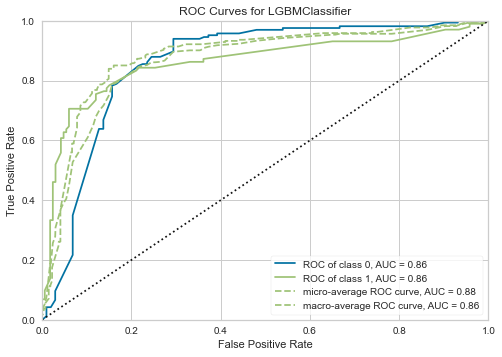

In [32]:
plot_model(model_lgbm)

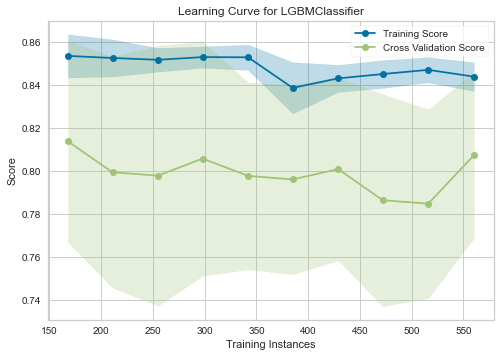

In [33]:
plot_model(estimator = model_lgbm, plot = 'learning')

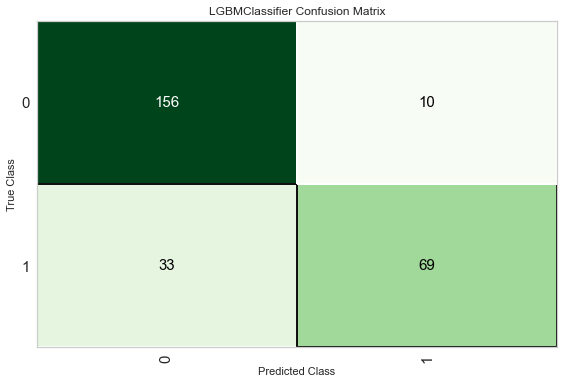

In [34]:
plot_model(estimator = model_lgbm, plot = 'confusion_matrix')

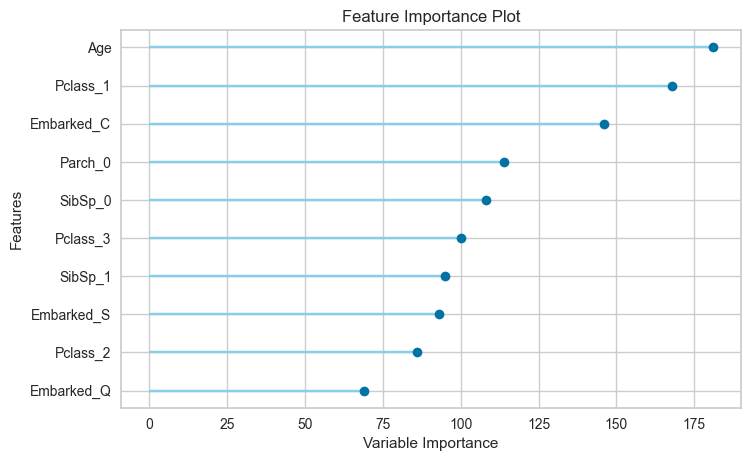

In [35]:
plot_model(estimator = model_lgbm, plot = 'feature')

In [36]:
model_lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1234, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)